## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

in this project, i will be working to understand the results of an A/B test run by an e-commerce website.  


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv ('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
len(df.axes[0])

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
#because The mean of a sample is equal to the sample (converted) proportion 
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
OldAndTreatment = len(df[(df['group']=='treatment') & (df['landing_page']=='old_page')])
NewAndControl = len(df[(df['group']=='control') & (df['landing_page']=='new_page')])
print(OldAndTreatment + NewAndControl)


3893


f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()
#There is no missing values in the dataset

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#creating a new dataset where the control group will be associate with the old page and the treatment group with the new page
df2 = df.loc[(df['group'] == 'treatment') & (df['landing_page']=='new_page') | ((df['group']=='control') & (df['landing_page']=='old_page'))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
#Double Check all of the correct rows were removed - this should be 0
OldAndTreatment = len(df2[(df2['group']=='treatment') & (df2['landing_page']=='old_page')])
NewAndControl = len(df2[(df2['group']=='control') & (df2['landing_page']=='new_page')])
print(OldAndTreatment + NewAndControl )



0


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2.loc[[2893]]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop(2893)
sum(df2['user_id'].duplicated())


0

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
#number of the  individual converting : 
converting = len(df2[df2['converted']==1]) 
print(converting)
#number of the individual convertin / the number of rows in the dataset.
print(converting / len(df2.axes[0]))

34753
0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
##number of the individual converting that are in the control group 
converting_control = len(df2[(df2['converted']==1) & (df2['group'] == 'control')])
print(converting_control)
#number of the individual convertin / the number of rows in the control group.
print(converting_control/len(df2[df2['group'] == 'control']))

17489
0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#number of the individual converting that are in the control group 
converting_treatment = len(df2[(df2['converted']==1) & (df2['group'] == 'treatment')]) 
print(converting_treatment)
#number of the individual convertin / the number of rows in the control group.
print(converting_treatment/len(df2[df2['group'] == 'treatment']))

17264
0.11880806551510564


d. What is the probability that an individual received the new page?

In [17]:
#number of the times the landing_page was the new page 
newpage = len(df2[df2['landing_page']=='new_page']) 
#number of the times the landing_page was the new page / the number of rows in the dataset.o
print(newpage / len(df2.axes[0]))

0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Based on the current finding , there isn’t  much differences in the rate of the  individual converting from the control group and the individual converting from the treatment group , and the probability that an individual received a new page is 0.5 which means that the probability of each page are quite similar,  as a result, there isn't a sufficient evidence to say that the new treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

H0: **$p_{old}$** - **$p_{new}$** >= 0
<br> H1: **$p_{old}$** - **$p_{new}$** < 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2['converted'].mean()
print(p_old)

0.11959708724499628


c.What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = len(df2[df2['group']=='treatment'])
print(n_new)

145310


d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = len(df2[df2['group']=='control'])
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([1,0], size = n_new, p=[p_new,(1-p_new)])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([1,0], size = n_old, p=[(p_old), (1-p_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted.mean() - old_page_converted.mean()

0.0020902927211846056

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = [] 
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], n_new, replace = True, p=[p_new, 1-p_new])
    old_page_converted = np.random.choice([1,0], n_old, replace = True, p=[p_old, 1-p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

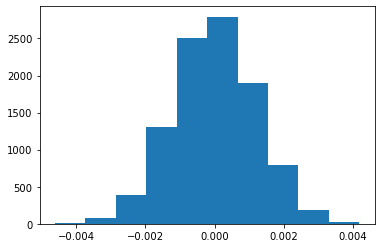

In [26]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
act_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()

In [28]:
print(act_diff)

-0.0015782389853555567


In [29]:
# i had an erorr (cant compare float with list) so i had to convert the data type of the array to float 
array_float = np.array(p_diffs,dtype=float)
(array_float> act_diff ).mean()

0.9038

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies? What does this value mean in terms of whether or not there is a difference between the new and old pages? 


**The P-value is the value we computed, and if it is more than 0.05, we will accept the null hypothesis , so for the the result, the p-value we calculated is more than 0.05, indicating that no difference exists between the new and old pages in other words we failed to reject the null hypothesis**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [30]:
import statsmodels.api as sm
convert_old = len(df2[(df2['converted']==1) & (df2['group'] == 'control')])
convert_new = len(df2[(df2['converted']==1) & (df2['group'] == 'treatment')]) 
n_old = n_old = len(df2[df2['group']=='control'])
n_new = n_new = len(df2[df2['group']=='treatment'])

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [31]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new] , alternative="smaller" )
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

In [32]:
from scipy.stats import norm
# measuring the critical value by Assuming 95% CI 
norm.ppf(1-(0.05))

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**the p-value is more than 0.05 and after comparing the z-score to the crucial value, we discovered that the z-score is higher,implying that we failed to reject the null hypothesis and that there is no difference between the new and old ,yes they do agree with findings in parts j and k** 

**.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression** because the conversion variable can have only two values.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [34]:
logit_model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [35]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Aug 2021   Pseudo R-squ.:               8.077e-06
Time:                        21:40:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value for the ab_page = 0.190 is different than what we found in Part II because we did a one-sided test in part II, whereas in part III we did a two-sided test.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It's a good idea to think about other factors it t could provide us with more information about the converted users, allowing us to make more accurate decisions , and the disadvantagesit it might lead to correlated errors and multicollinearity**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [36]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.loc[:,"country"]

user_id
834778    UK
928468    US
822059    UK
711597    UK
710616    UK
          ..
653118    US
878226    UK
799368    UK
655535    CA
934996    UK
Name: country, Length: 290584, dtype: object

In [37]:
###Create the necessary dummy variables
df_new[['UK', 'US']] = pd.get_dummies(df_new['country'])[['UK' ,'US']]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [38]:
df_new['intercept'] = 1
logit_model2 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US']])
result2 = logit_model2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 15 Aug 2021   Pseudo R-squ.:               1.521e-05
Time:                        21:40:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

**The p-value for the UK users and the US users is grater than 0.05 so again we fail to reject the null hypothesis,and cant say the the country have an impact on conversion**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [39]:
df_new['UK_page'] = df_new['ab_page']*df_new['UK']
df_new['US_page'] = df_new['ab_page']*df_new['US']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,UK_page,US_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [40]:
logit_model3 = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'US', 'ab_page', 'UK_page', 'US_page']])
result3 = logit_model3.fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 15 Aug 2021   Pseudo R-squ.:               3.482e-05
Time:                        21:40:29   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_page        0.0783      0.057      1.378      0.168      -0.033       0.190
US_page        0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

**The p-value for each variable is greater than 0.05, which will corroborate the fact that we failed to reject the null hypothesis,and we can also tell that the interactions between page and country have no significant effects on conversion**

<a id='conclusions'></a>
**based on the statistical tests we applied The result indicated that the new and old pages had equivalent chances of converting users accordingly, the company should not implement the new page because there is no sufficient evidence that they will have more converting users**

